<a href="https://colab.research.google.com/github/RyanOliveira10/Data-Science/blob/main/Projeto_Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Unicornios

Unicornios é um termo muito utilizado para se referir as startups que passaram o seu valor de mercado para mais de 1 bilhao

In [4]:
#importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [6]:
#lendo os dados

Base_dados = pd.read_csv('unicorns till sep 2022.csv')

#verificar dimensao
Base_dados.shape

(1186, 7)

In [7]:
Base_dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [9]:
Base_dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [25]:
#Renomeando as colunas
Base_dados.rename( columns= {
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Investors' : 'Investidores',
}, inplace = True)
Base_dados.head()

,Empresa,Valor ($),Data de Adesão,País,City,Setor,Investidores
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [20]:
#Verificar Tipo de informação
Base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($)       1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   País            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [26]:
Base_dados.isnull().sum()

Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
City               0
Setor              0
Investidores      18
dtype: int64

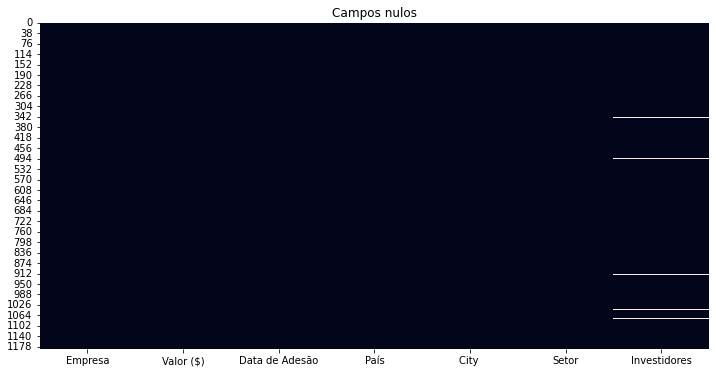

In [34]:
# Grafica
plt.figure(figsize = (12, 6))
plt.title('Campos nulos')
sns.heatmap( Base_dados.isnull(), cbar=False);

In [35]:
#valores unicos
Base_dados.nunique()

Empresa           1183
Valor ($)          222
Data de Adesão     695
País                48
City               286
Setor               34
Investidores      1152
dtype: int64

In [36]:
# valores unicos - rank
Base_dados['Setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [37]:
Base_dados['Setor'].value_counts( normalize = True)

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

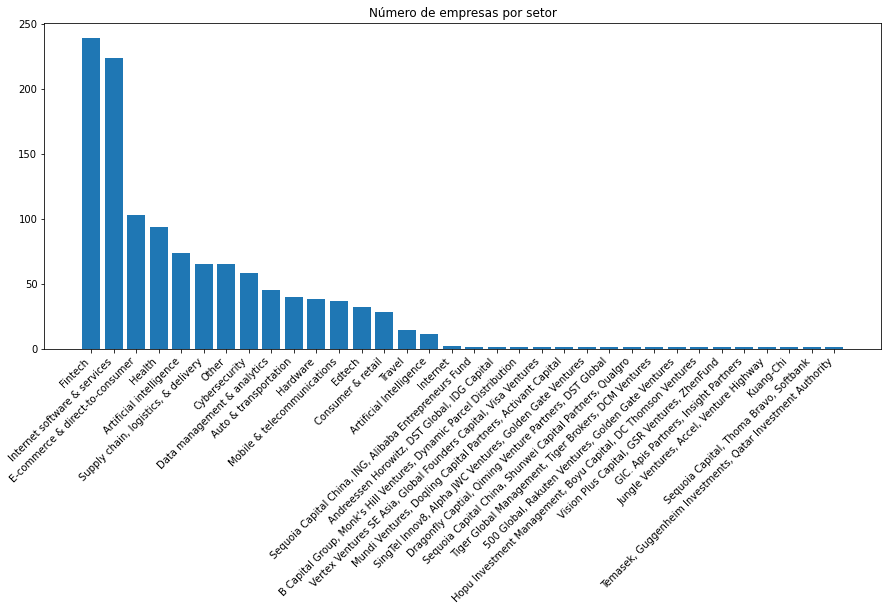

In [46]:
plt.figure(figsize = (15, 6))
plt.title('Número de empresas por setor')
plt.bar(Base_dados['Setor'].value_counts().index, Base_dados['Setor'].value_counts())
plt.xticks(rotation=45, ha='right');

In [48]:
Base_dados['País'].value_counts()

United States           636
China                   174
India                    70
United Kingdom           46
Germany                  29
France                   24
Israel                   22
Canada                   19
Brazil                   17
South Korea              17
Singapore                13
Sweden                    8
Mexico                    8
Australia                 8
Indonesia                 7
Netherlands               7
Hong Kong                 7
Ireland                   6
Japan                     6
Switzerland               6
Norway                    5
Finland                   4
Spain                     4
Turkey                    3
Colombia                  3
Belgium                   3
United Arab Emirates      3
Austria                   2
Lithuania                 2
Vietnam                   2
Thailand                  2
Estonia                   2
Chile                     2
Denmark                   2
Philippines               2
Croatia             

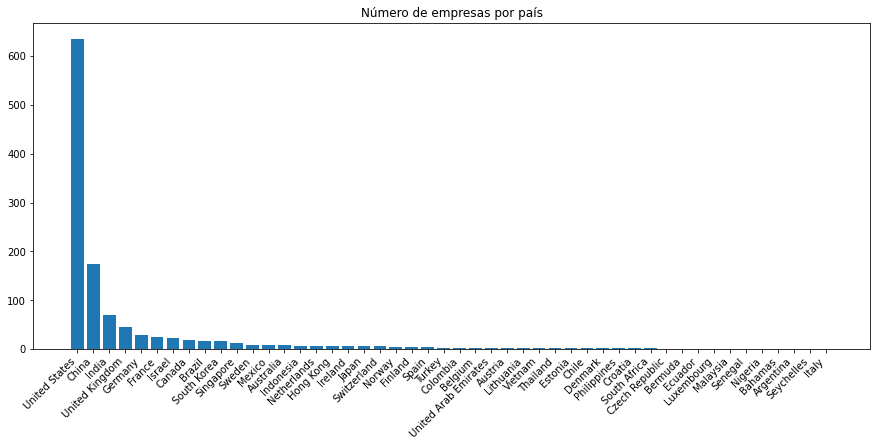

In [49]:
plt.figure(figsize = (15, 6))
plt.title('Número de empresas por país')
plt.bar(Base_dados['País'].value_counts().index, Base_dados['País'].value_counts())
plt.xticks(rotation=45, ha='right');

In [54]:
Analise = round( Base_dados['País'].value_counts( normalize = True) * 100, 1)
Analise

United States           53.6
China                   14.7
India                    5.9
United Kingdom           3.9
Germany                  2.4
France                   2.0
Israel                   1.9
Canada                   1.6
Brazil                   1.4
South Korea              1.4
Singapore                1.1
Sweden                   0.7
Mexico                   0.7
Australia                0.7
Indonesia                0.6
Netherlands              0.6
Hong Kong                0.6
Ireland                  0.5
Japan                    0.5
Switzerland              0.5
Norway                   0.4
Finland                  0.3
Spain                    0.3
Turkey                   0.3
Colombia                 0.3
Belgium                  0.3
United Arab Emirates     0.3
Austria                  0.2
Lithuania                0.2
Vietnam                  0.2
Thailand                 0.2
Estonia                  0.2
Chile                    0.2
Denmark                  0.2
Philippines   

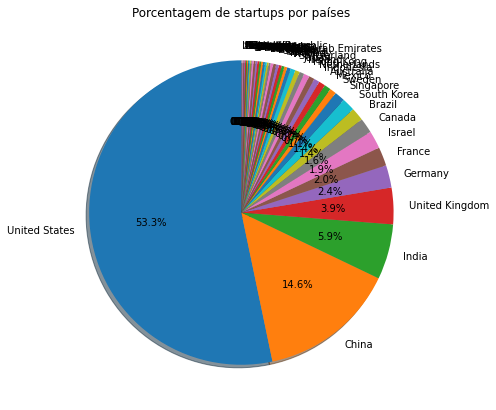

In [62]:
plt.figure( figsize = (15, 7))
plt.title('Porcentagem de startups por países')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle= 90,
    autopct='%1.1f%%'
);


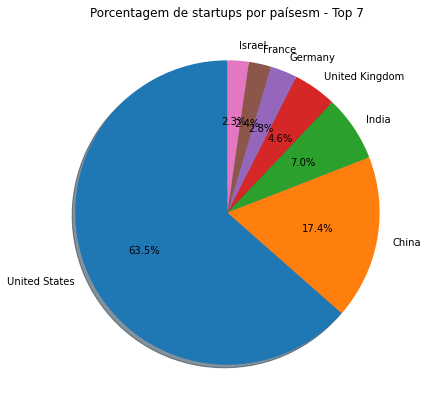

In [65]:
plt.figure( figsize = (15, 7))
plt.title('Porcentagem de startups por paísesm - Top 7')
plt.pie(
    Analise.head(7),
    labels = Analise.index[0:7],
    shadow=True,
    startangle= 90,
    autopct='%1.1f%%'
);

In [66]:
Base_dados.head()

,Empresa,Valor ($),Data de Adesão,País,City,Setor,Investidores
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [69]:
Base_dados['Data de Adesão'] = pd.to_datetime(Base_dados['Data de Adesão'])

In [70]:
Base_dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [72]:
# Extraindo ano e mês
Base_dados['Mês'] = pd.DatetimeIndex( Base_dados['Data de Adesão']).month
Base_dados['Ano'] = pd.DatetimeIndex( Base_dados['Data de Adesão']).year

In [73]:
Base_dados.head()

,Empresa,Valor ($),Data de Adesão,País,City,Setor,Investidores,Mês,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [76]:
# Tabela Analitica 
Base_dados.groupby( by = ['País', 'Ano', 'Mês']).count().index

MultiIndex([(    'Argentina', 2021,  8),
            (    'Australia', 2018,  1),
            (    'Australia', 2019,  3),
            (    'Australia', 2021,  5),
            (    'Australia', 2021,  7),
            (    'Australia', 2021, 12),
            (    'Australia', 2022,  3),
            (      'Austria', 2021,  3),
            (      'Austria', 2021,  6),
            (      'Bahamas', 2021,  7),
            ...
            ('United States', 2022,  1),
            ('United States', 2022,  2),
            ('United States', 2022,  3),
            ('United States', 2022,  4),
            ('United States', 2022,  5),
            ('United States', 2022,  6),
            ('United States', 2022,  7),
            ('United States', 2022,  8),
            (      'Vietnam', 2021, 10),
            (      'Vietnam', 2021, 12)],
           names=['País', 'Ano', 'Mês'], length=441)